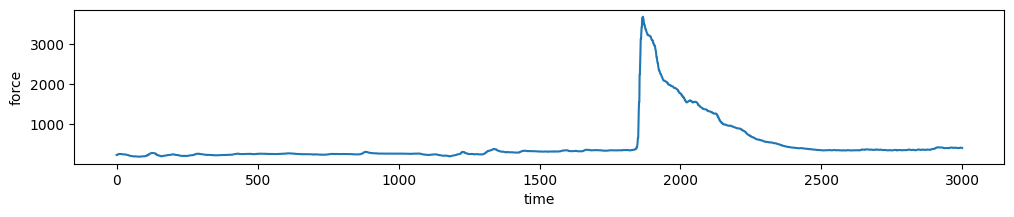

In [1]:
import pandas as pd
df1=pd.read_csv("rs1.csv",header=1)
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 2)) 
plt.plot(df1["Time"],df1["Grip Force(g)"])
plt.xlabel("time")
plt.ylabel("force")
plt.show()

T1: 1812 
 T2: 1868 
 T2-T1: 56 
 peak force 3684.6


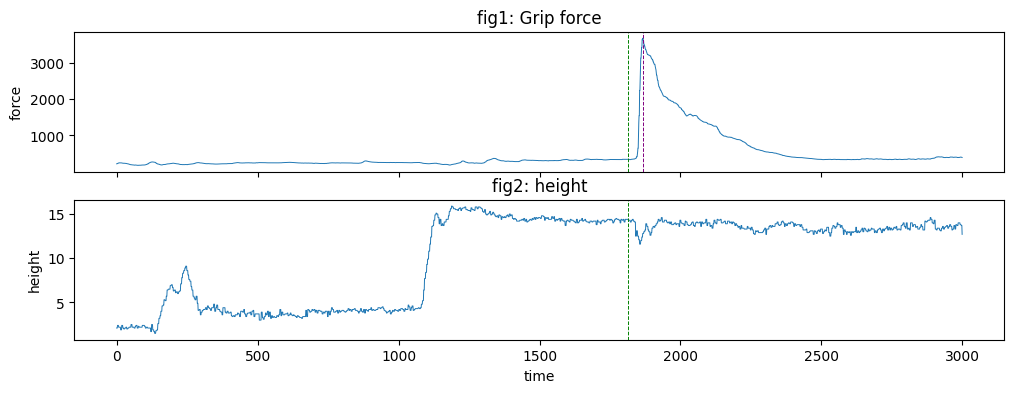

T1: 1467 
 T2: 1521 
 T2-T1: 54 
 peak force 3156.0


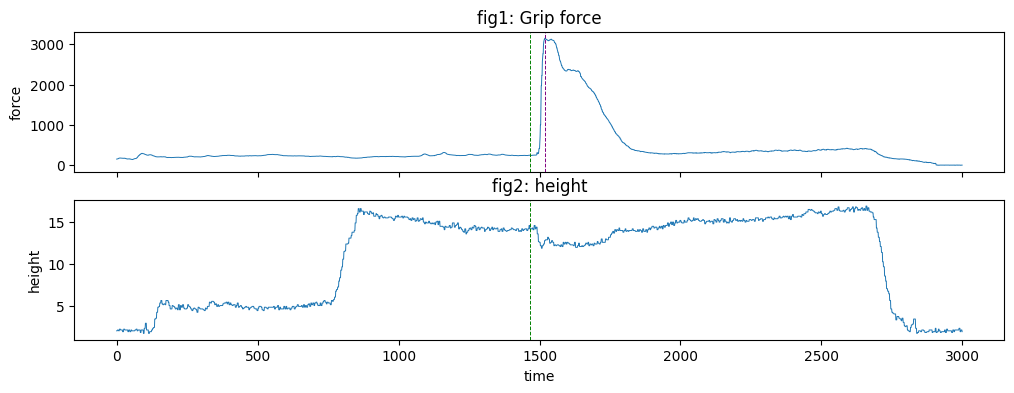

T1: 1493 
 T2: 1548 
 T2-T1: 55 
 peak force 3214.7


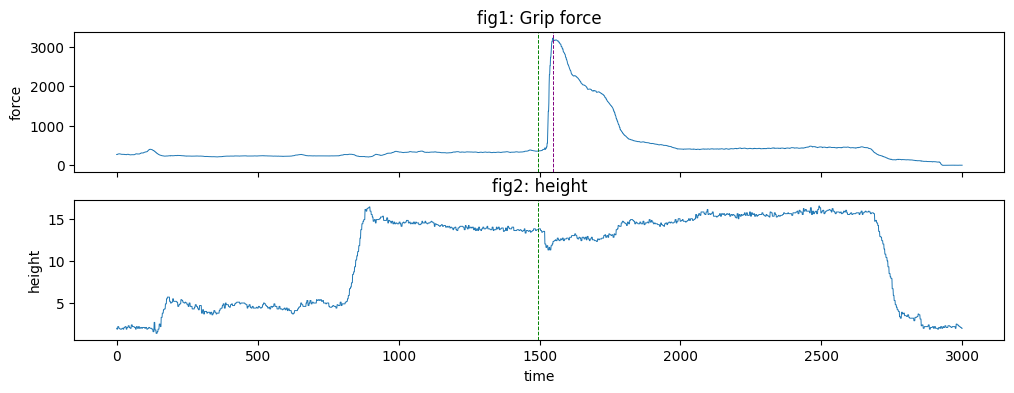

T1: 1620 
 T2: 1673 
 T2-T1: 53 
 peak force 3403.9


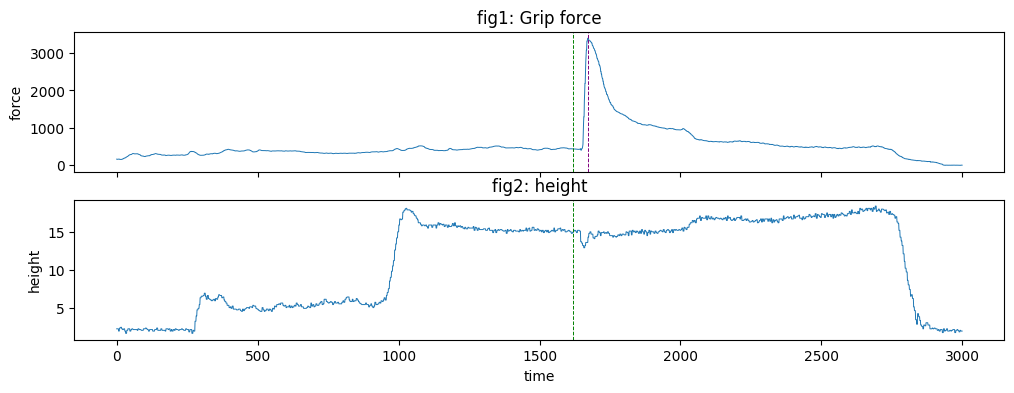

T1: 1427 
 T2: 1484 
 T2-T1: 57 
 peak force 3545.7


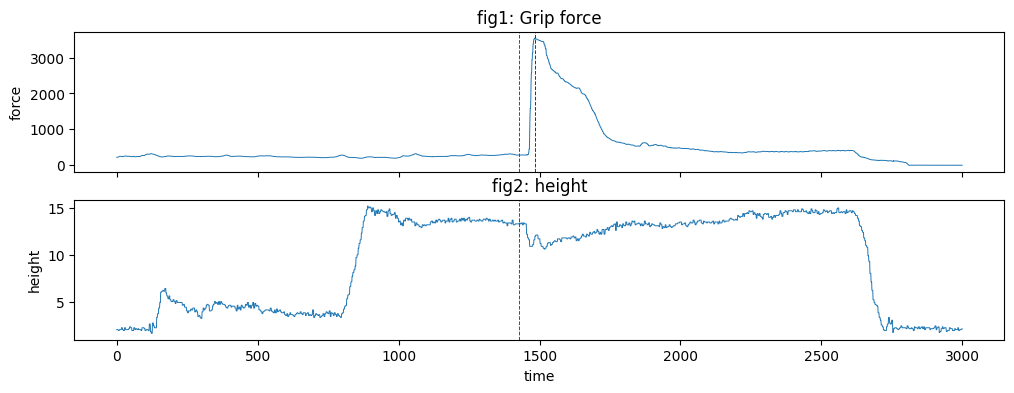

In [2]:
#儲存圖片檔
import pandas as pd
dataframes = {}  # 創建一個字典來存儲dataframe

for i in range(1, 6):
    file_name = f"rs{i}.csv"
    df = pd.read_csv(file_name, header=1)
    # Create a pandas Series from your list of values
    df_Trig= df["Trig"]
    # Use boolean indexing to find the first index where the value is greater than 15
    T1 = df_Trig.gt(0).idxmax()
    subset = df["Grip Force(g)"][T1:T1+500]
    grip_force_data = list(df["Grip Force(g)"])
    max_value = max(subset)
    max_index = grip_force_data.index(max_value) + 1
    
    T2 = max_index    
    print("T1:",T1,"\n","T2:",T2,"\n","T2-T1:",T2-T1,"\n","peak force",max_value)
    fig, axs = plt.subplots(2, 1, figsize=(12, 4), sharex=True)
    # 繪製第一個子圖
    axs[0].plot(df["Time"],df["Grip Force(g)"],linewidth=0.7)
    axs[0].set_ylabel('force')
    axs[0].set_title('fig1: Grip force')
    # 在第一個子圖上添加虛線
    axs[0].axvline(x=T1, color='green', linestyle='--', linewidth=0.7)
    axs[0].axvline(x=T2, color='purple', linestyle='--', linewidth=0.7)
    
    
    # 繪製第二個子圖
    axs[1].plot(df["Time"],df["Height (cm)"],linewidth=0.7)
    axs[1].set_ylabel('height')
    axs[1].set_title('fig2: height')
    # 在第二個子圖上添加虛線
    axs[1].axvline(x=T1, color='green', linestyle='--', linewidth=0.7)
    
    plt.xlabel("time")
    plt.savefig(f'older_rs{i}.jpg')
    plt.show()

In [3]:
# 儲存記錄檔

results = []  # 創建一個列表來存儲每次迴圈的結果

for i in range(1, 6):
    file_name = f"rs{i}.csv"
    df = pd.read_csv(file_name, header=1)
    
    # 從DataFrame中取出Trig列
    df_Trig= df["Trig"]
    
    # 找到Trig大於0的第一個索引
    T1 = df_Trig.gt(0).idxmax()
    
    # 從Grip Force列取出T1之後500個數據
    subset = df["Grip Force(g)"][T1:T1+500]
    grip_force_data = list(df["Grip Force(g)"])
    
    # 找到subset中的最大值和相對應的索引
    max_value = max(subset)
    max_index = grip_force_data.index(max_value) + 1
    
    # 計算T2-T1的值
    delta_T = max_index - T1
    
    # 將計算結果添加到列表中
    results.append((T1,T2,delta_T, max_value))

# 將結果轉換為DataFrame
results_df = pd.DataFrame(results, columns=["T1","T2","T2-T1", "peak force"])

# 將結果儲存為Excel檔案
results_df.to_csv("results_rs.csv", index=False)